# Tweaking plots

In this section, we’ll look at how to adjust the appearance of plots to make them clearer, more informative, and easier to interpret.

We’ll cover how to:

* set **axis labels**
* set **plot titles**
* create and edeit a **legend**
* arrange **suplots** to make a **multi-panel figure**
* adjust the **size** and **shape** of figures

While `Seaborn` usually makes good choices automatically, these kinds of plot *tweaks* are often essential for producing meaningful, reader-friendly figures.

## `Matplotlib`


`Seaborn` is designed to produce nice looking plots with minimal effort. However, it is built on top of an older, lower-level plotting library called `Matplotlib`, which provides the underlying functionality.`Matplotlib` (inspired by the plotting tools available in MATLAB - another scientific programming environment) contains functions for controlling almost every element of a plot — from axis limits and labels to subplot layouts and figure sizes. Usually if there is something you would like to edit in the plot, it is possible to do so using these functions. 

If we want to manually set something like the axis labels, axis range, or figure layout, we often call `Matplotlib` functions directly. You may have noticed some of these calls which often start with `plt.` throughout this chapter:

* `Matplotlib` functions are preceded by `plt.` for example `plt.xlim()` or `plt.subplot()`
* In contrast, `Seaborn` functions aare preceded by `sns.` (Samuel Norman Seaborn!), e.g. `sns.histplot()`.


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Import the data

We'll use the Titanic data (data on 890 people who were onbboard the Titanic when it sank). This includes some odd sounding variables such as <tt>SibSp</tt> but don't worry about them for now.

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/titanic_2.csv')
display(titanic)

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1    female  38.0      1      0          PC 17599  71.2833   C85        C  
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3    female  35.0      1      0            113803  53.1000  C123        S  
4      male  35.0      0      0            373450   8.0500   NaN        S  
..      ...   ...    ...    ...               ...      ...   ...      ...  
886    male  27.0      0      0            211536  13.0000   NaN        S  
887  female  19.0      0      0            112053  30.0000   B42        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
889    male  26.0      0      0            111369  30.0000  C148        C  
890    male  32.0      0      0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

As an initial exercise, let's plot a histogram of the age of the passengers:

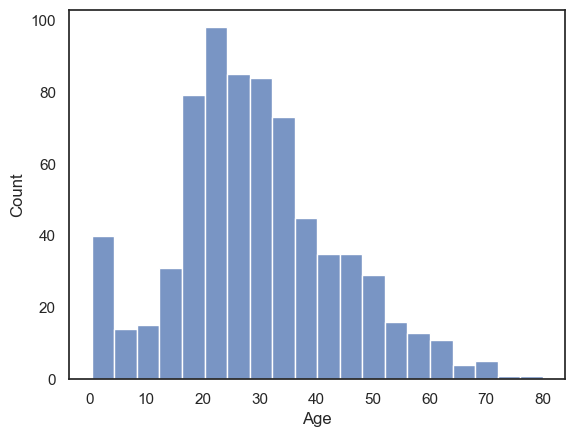

In [3]:
sns.histplot(data=titanic, x='Age')
plt.show()

We can see that there were a lot of young adults on the Titanic - possibly emigrating to start a new life in America. Let's try tweaking this plot to improve its interpretability

## Axis Labels & Title

- `plt.xlabel()`
- `plt.ylabel()`
- `plt.title()`

Your axis labels should always convey what is being plotted. When using `Seaborn` with a `Pandas` DataFrame, the axis labels *usually* are taken automatically from the **column names**. These are often meaningful, but sometimes they can be cryptic codes that wouldn’t make sense to a general reader — for example, in the Titanic dataset we are using what do you think <tt>Pclass</tt>, <tt>SibSp</tt>, or <tt>Parch</tt> mean?

If the meaning isn’t immediately clear, you must edit the labels. **Clear, descriptive labels** are essential for an interpretable figure. You can also add a title to your plot to describe what the figure shows.

Just for fun, let’s label the $x$-axis “bananas”, the $y$-axis “fruitbats”, and give our plot the title “A load of nonsense”:

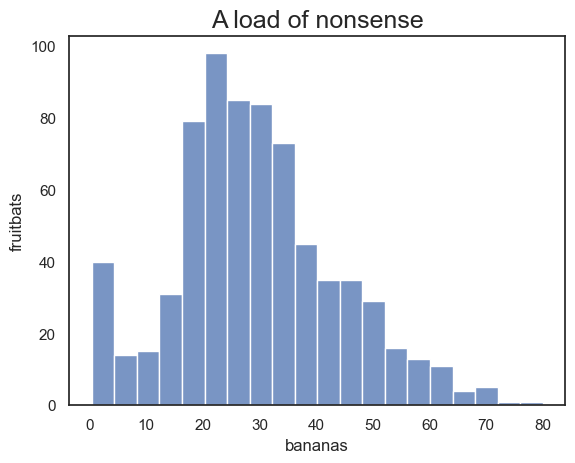

In [4]:
sns.histplot(data=titanic, x='Age')
plt.xlabel('bananas') #Change the x axis label from the default
plt.ylabel('fruitbats') #Change the y axis label from the default
plt.title('A load of nonsense', fontsize=18) # note I made the font size bigger!
plt.show()

## Legend

- plt.legend()

When your plot contains multiple groups or categories, it’s important to include a legend so that the reader can tell which colour or linetype corresponds to which group.

For example, let’s plot the age distributions of passengers in the different classes on the Titanic. Here we'll use a KDE plot here rather than a histogram, as the histogram is just a bit too cluttered with the three distributions (you can try changing it to a histogram to see what I mean).

By default, `Seaborn` adds a legend automatically when a hue variable is specified, but you can adjust it using Matplotlib’s `plt.legend()`. For example, Here we edit the category labels, the title, and reposition the legend on the plot.

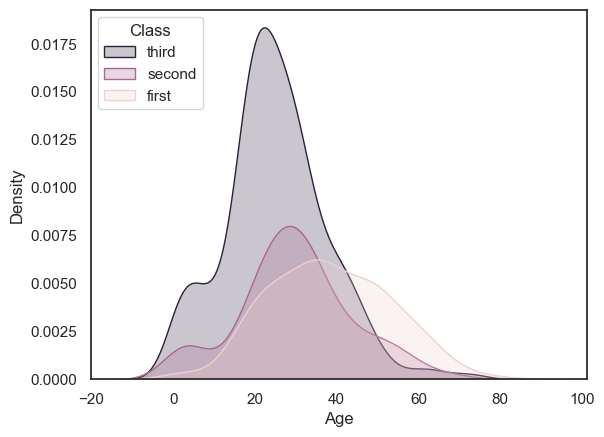

In [5]:
sns.kdeplot(data=titanic, x='Age', hue='Pclass', fill=True)
plt.legend(['third', 'second','first'], title='Class',loc = 'upper left')
plt.show()

***Note on the data:** There were a lot of young adults in 3rd class, and almost no children in first class*

## Ordering

When plotting categorical data where the categories are defined by strings, `Seaborn` will usually plot them in the order they appear in the DataFrame — that is, from top to bottom in the dataset.

However, this default order is not always ideal or meaningful. For example, consider the Oxford weather dataset: the months might appear in the order they happen to occur in the data (e.g. starting in September) rather than in calendar order.

This can make your plot confusing or misleading.


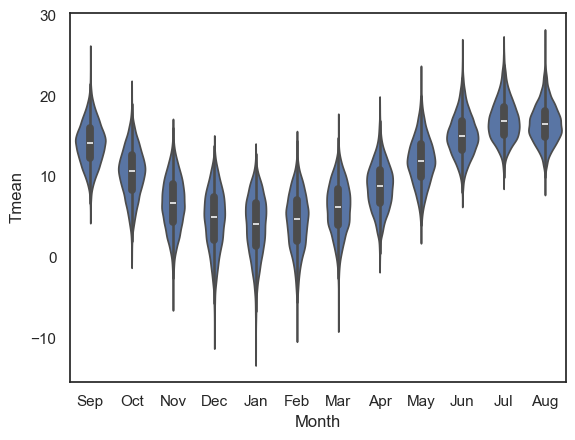

In [6]:
weather = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/OxfordWeather2.csv')
sns.violinplot(data=weather, x='Month', y='Tmean')
plt.show()

We can force the order in which the categories are presented useing the argument `order`

* **Note** this would become `hue_order` if we were using the `hue` property to disaggregate categories of data in a KDE plot or histogram.

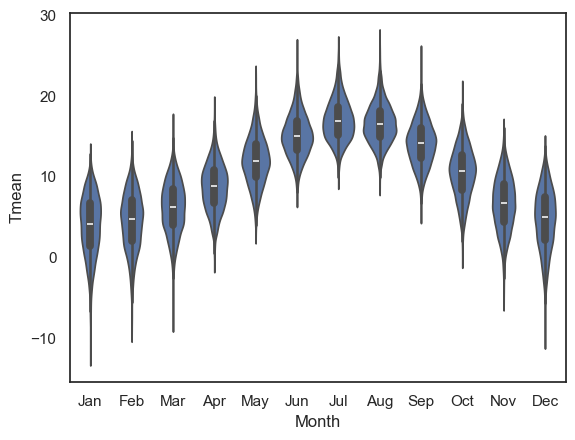

In [7]:
sns.violinplot(data=weather, x='Month', y='Tmean', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

## Subplots

Often, we want to present multiple plots side by side to compare them directly or to illustrate a broader point.

Returning to the Titanic dataset, suppose we want to plot histograms of passenger age, shown separately for men and women.
We may wish to display these plots next to each other as panels within a single figure.

This can be done using the function `plt.subplot()`, which allows us to create a figure containing multiple panels (subplots). Each subplot is addressed by its position within a grid, defined by three numbers inside `plt.subplot(rows, columns, index)`:

* **rows** — the total number of rows of subplots
* **columns** — the total number of columns of subplots
* **index** — the position of the current subplot (counted left to right, top to bottom)

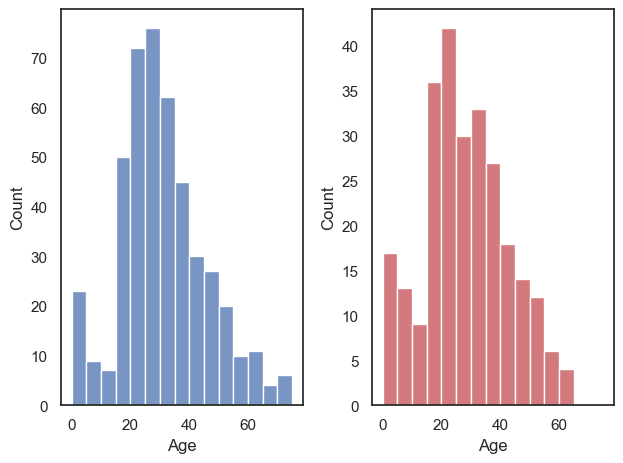

In [14]:
plt.subplot(1,2,1)
sns.histplot(data=titanic.query('Sex == "male"'), x='Age', color='b', bins=range(0,80,5))

plt.subplot(1,2,2)
sns.histplot(data=titanic.query('Sex == "female"'), x='Age', color='r', bins=range(0,80,5))

plt.tight_layout() # shift the plots sideways so they don't overlap
plt.show()

In the example above we have **one row and two columns**; if we wanted **two rows and one column**, we would do this:

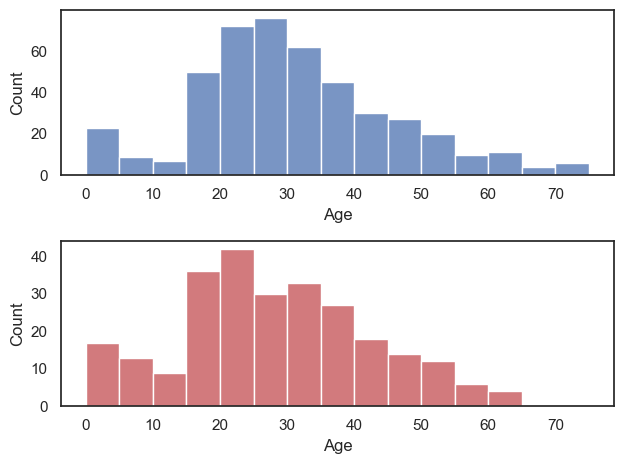

In [15]:
plt.subplot(2,1,1)
sns.histplot(data=titanic.query('Sex == "male"'), x='Age', color='b', bins=range(0,80,5))

plt.subplot(2,1,2)
sns.histplot(data=titanic.query('Sex == "female"'), x='Age', color='r', bins=range(0,80,5))

plt.tight_layout() # shift the plots so they don't overlap
plt.show()

You'll notice that it is actually a bit easier to compare the distributions when they are arranged vertically. For example we can see that the maximum age for women was higher, and the peak age for women was (slightly) lower. Good choice!

### plt.subplot() syntax

The function plt.subplot() has three arguments:
* `plt.subplot(rows, columns, index)`

For example, if we want to create a figure with one row and two columns (plots side-by-side), we use `plt.subplot(1,2,i)`, where <tt>i</tt> is the location to put the next plot, reading from left to right and top to bottom. This is perhaps best explained by diagram.

Here is how I make a subplot with **3 rows and 2 columns**, then there are overall 6 possible places to put any one plot. The red number on each plot refers to the specific index for that location.    
    
<img src="../images/MT_wk2_subplot32i.png" width="60%"/>

Here is how I make a subplot with **2 rows and 4 columns**. Again, the red number on each plot refers to the specific index for that location, now there are 8 total plots.   
    
<img src="../images/MT_wk2_subplot24i.png" width="100%" />


### plt.tight_layout()

Sometimes the axis labels or titles of one subplot can overlap with the adjacent subplot, especially when you have multiple panels in a single figure. The command `plt.tight_layout()` automatically adjusts the spacing between subplots so that all elements fit neatly within the figure.

## Axis range

- `plt.xlim()`
- `plt.ylim()`

It is often easier to compare across plots if the axis ranges are the same. `Seaborn` will automatically adjust the axes to fit the range of the data in each plot. This is convenient for individual plots, but it can make side-by-side comparisons misleading, e.g., it might not look like there is a difference until you notice one is scaled between 1 and 100 and the other from 1 to 1000!

We can set the axis range using the functions:

* `plt.ylim()` (to set the limits in $y$)
* `plt.xlim()` (to set the limits in $x$)

Let’s recreate our two side-by-side histograms of passenger age for men and women, but this time we’ll set the $y$-axis range to be the same in both plots:

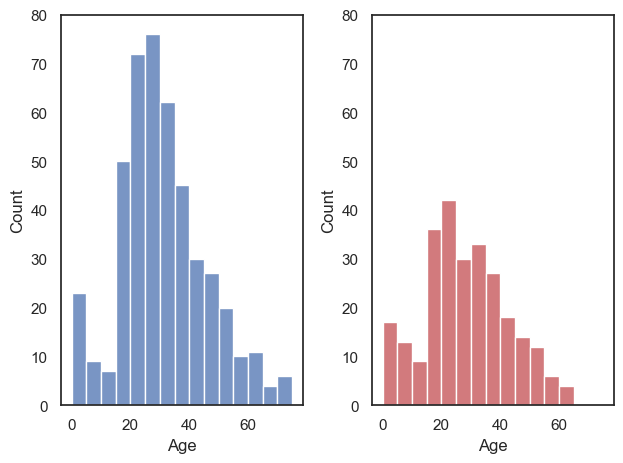

In [16]:
plt.subplot(1,2,1)
sns.histplot(data=titanic.query('Sex == "male"'), x='Age', color='b', bins=range(0,80,5))
plt.ylim([0,80])

plt.subplot(1,2,2)
sns.histplot(data=titanic.query('Sex == "female"'), x='Age', color='r', bins=range(0,80,5))
plt.ylim([0,80])

plt.tight_layout() # shift the plots sideways so they don't overlap
plt.show()

Ooh, suddenly we can see that there were a lot more men than women on the Titanic!

* **Note** It is generally most relevant to match the $y$-axes when two subplots are side-by-side, and the $x$-axes when the subplots are arranged one above the other. However, it is often (but not always) best to match both $x$ and $y$ axes!

## Figure size

`plt.figure(figsize=(x,y))`

Maybe the figures in your Jupyter notebook are too big or too small for your liking, or have the wrong aspect ratio.

You can change this by 'pre-creating' your figure at a certain size using `plt.figure(figsize=(x,y))`, **before** running the plotting command.

<tt>x</tt> and <tt>y</tt> are the desired size, nominally in inches, but this will depend on the size of your screen (!):

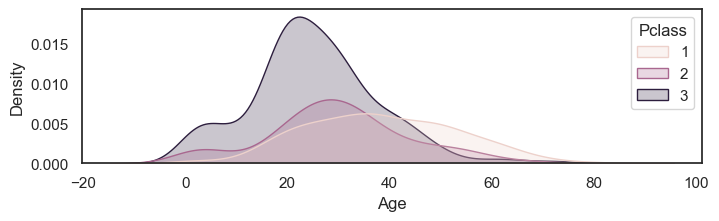

In [18]:
# create a low, wide figure
plt.figure(figsize=(8,2))
sns.kdeplot(data=titanic, x='Age', hue='Pclass', fill=True)
plt.show()

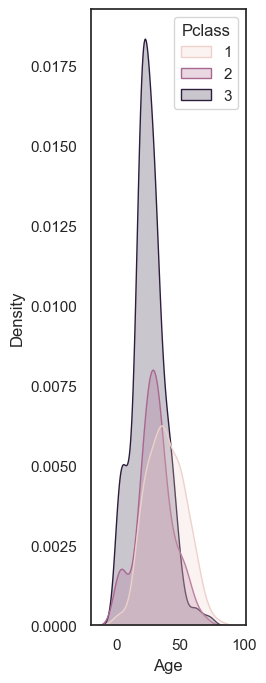

In [19]:
# create a tall thin figure
plt.figure(figsize=(2,8))
sns.kdeplot(data=titanic, x='Age', hue='Pclass', fill=True)
plt.show()

Note that this applies to the whole figure, which could be made up from several subplots - so this syntax can be useful to avoid your subplots getting very stretched - compare the default aspect ratio here:

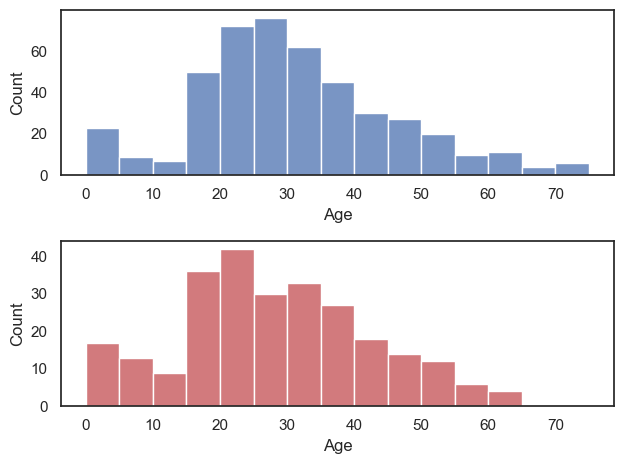

In [20]:
plt.subplot(2,1,1)
sns.histplot(data=titanic.query('Sex == "male"'), x='Age', color='b', bins=range(0,80,5))

plt.subplot(2,1,2)
sns.histplot(data=titanic.query('Sex == "female"'), x='Age', color='r', bins=range(0,80,5))

plt.tight_layout() # shift the plots sideways so they don't overlap
plt.show()

... with a tweaked one here:

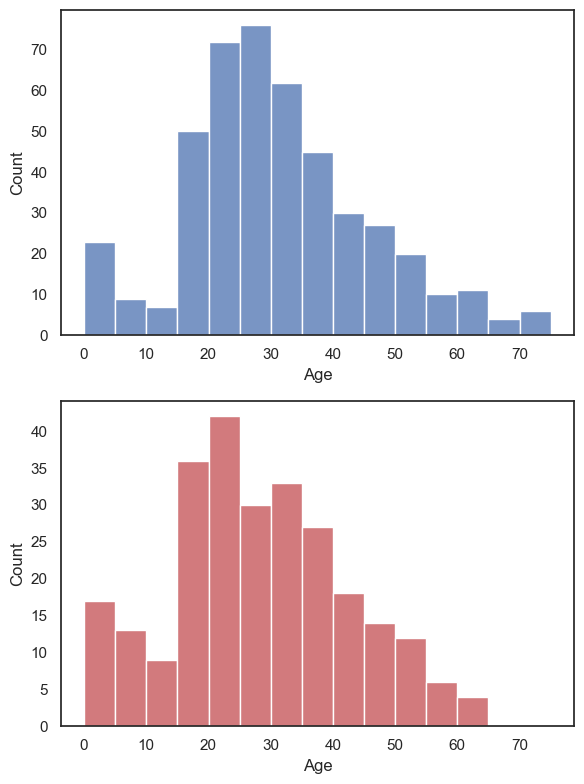

In [21]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
sns.histplot(data=titanic.query('Sex == "male"'), x='Age', color='b', bins=range(0,80,5))

plt.subplot(2,1,2)
sns.histplot(data=titanic.query('Sex == "female"'), x='Age', color='r', bins=range(0,80,5))

plt.tight_layout() # shift the plots sideways so they don't overlap
plt.show()